In [1]:
import pandas as pd

#s0: 50Mbps, 20ms
#s1:
# rate0 = [2,4,6,8,10]
# rate1 = [40,42,44,46,48,50]
schedulerTypes = [0,1,2,3,5]
# skip = [97, 188]

comTime = []
# get complete time

for j in range(1,101):
    # if(j in skip):
    #     continue
    c_time = []
    for i in schedulerTypes:
        dir = 'dynamic0-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        # print(j)
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    # c_time.append(r0)
    # c_time.append(r1)
    # if(d == ""):
    #     c_time.append("0") 
    # else:
    #     c_time.append(d)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'MAB'])
print(dataTotal)


         RR     MRTT    BLEST      ECF      MAB
0   4.47476  5.43455  5.50699  5.39681  4.38535
1   5.01078  5.28333  5.45000  5.65329  4.59395
2   4.54063  5.56286  5.43374  5.06561  4.55246
3   4.36999  5.17292  5.50029  5.35149  4.37991
4   4.86636  5.25083  6.34008  5.49559  4.71502
..      ...      ...      ...      ...      ...
95  4.40515  5.40152  5.52142  5.24552  4.61704
96  4.58137  5.51066  5.21927  4.90300  5.12893
97  5.20638  5.45165  5.63359  5.36733  4.71933
98  6.31973  6.02314  6.61266  5.14361  6.19308
99  4.71937  4.93906  5.22871  5.67645  4.38373

[100 rows x 5 columns]


In [2]:
toDrop = dataTotal.loc[dataTotal["BLEST"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MAB"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)


In [5]:
## high dynamic

# toDrop = dataTotal.loc[dataTotal["BLEST"] > 18.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["RR"] > 18.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MRTT"] > 18.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["ECF"] > 18.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MAB"] > 12.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)

In [8]:
# toDrop =dataTotal.loc[dataTotal["MAB"] > 9.5].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["RR"] < 6].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["MRTT"] < 9.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["BLEST"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["RR"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["ECF"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MAB"] < 6].index.tolist()
# dataTotal = dataTotal.drop(toDrop)

dataTotal.count()


RR       92
MRTT     92
BLEST    92
ECF      92
MAB      92
dtype: int64

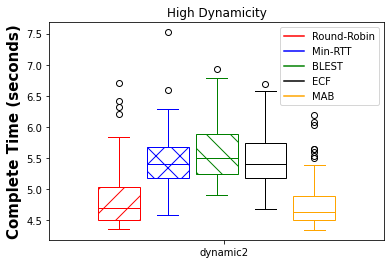

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['MAB']]

ticks = ['dynamic2']
bar_width = 0.3
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
# plt.figure(figsize=(10,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.05,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.05*2,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.05*3,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.05*4,widths=bar_width, patch_artist=True)
for box in ct_plot4['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
# plt.xlabel("LTE-Wifi Delay (ms)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('High Dynamicity')
# plt.savefig('./comTimeDiffDelay.png', format='png')
plt.show()

/home/shirley/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


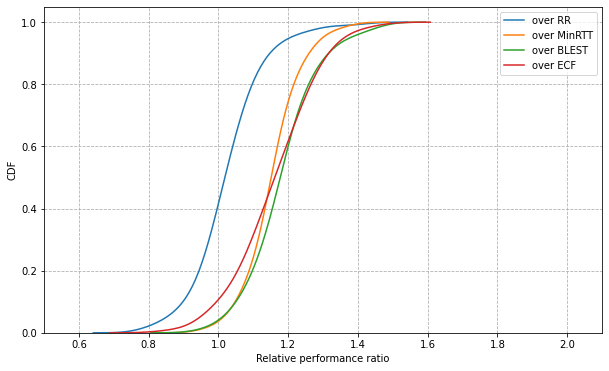

In [10]:

import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data = dataTotal['RR']/dataTotal['MAB'], cumulative = True, label = "over RR")
sns.kdeplot(data = dataTotal['MRTT']/dataTotal['MAB'], cumulative = True, label = "over MinRTT")
sns.kdeplot(data = dataTotal['BLEST']/dataTotal['MAB'], cumulative = True, label = "over BLEST")
sns.kdeplot(data = dataTotal['ECF']/dataTotal['MAB'], cumulative = True, label = "over ECF")
plt.legend()
plt.grid(linestyle="--") 
plt.xlim(0.5,2.1)
plt.xlabel("Relative performance ratio")
plt.ylabel("CDF")
# plt.savefig('./performance-ratio-cdf.png', format='png')
plt.show()
  

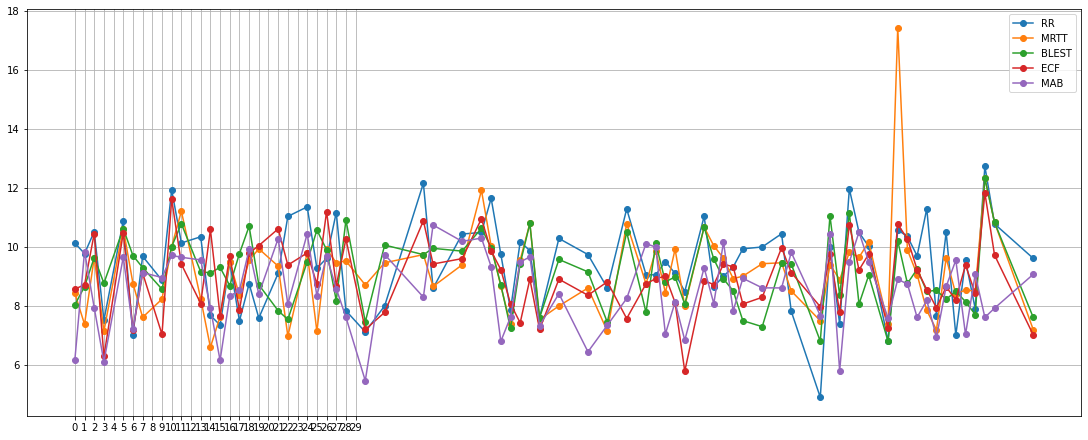

In [35]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = dataTotal['RR']
ct1 = dataTotal['MRTT']
ct2 = dataTotal['BLEST']
ct3 = dataTotal['ECF']
ct4 = dataTotal['MAB']

plt.figure(figsize=(15, 6), layout='constrained')

plt.plot(ct0, label='RR', marker='o')
plt.plot(ct1, label='MRTT', marker='o')
plt.plot(ct2, label='BLEST', marker='o')
plt.plot(ct3, label='ECF', marker='o')
plt.plot(ct4, label='MAB', marker='o')

plt.xticks(np.arange(0, 30, 1))
plt.grid(True)
plt.legend()
plt.show()

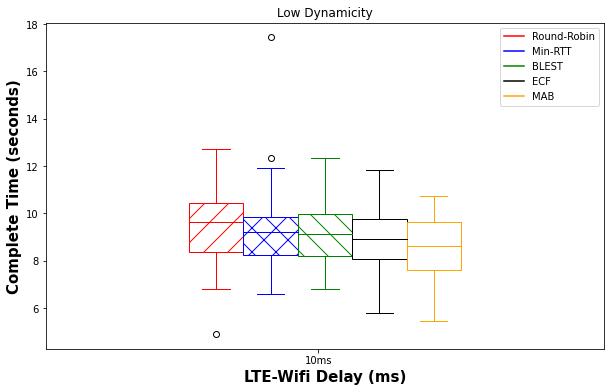

In [36]:
ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['MAB']]

ticks = ['10ms']
bar_width = 0.16
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(10,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot4['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
plt.xlabel("LTE-Wifi Delay (ms)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('Low Dynamicity')
# plt.savefig('./comTimeDiffDelay.png', format='png')
plt.show()

In [56]:
low = dataTotal.loc[dataTotal['scenario'] == "0"]
medium = dataTotal.loc[dataTotal['scenario'] == "1"]
high = dataTotal.loc[dataTotal['scenario'] == "2"]

# print (low)
# print (medium)
# print (high)


In [57]:

dl1=low.loc[low['delay']==10]
dl2=low.loc[low['delay']==100]
dl3=low.loc[low['delay']==200]


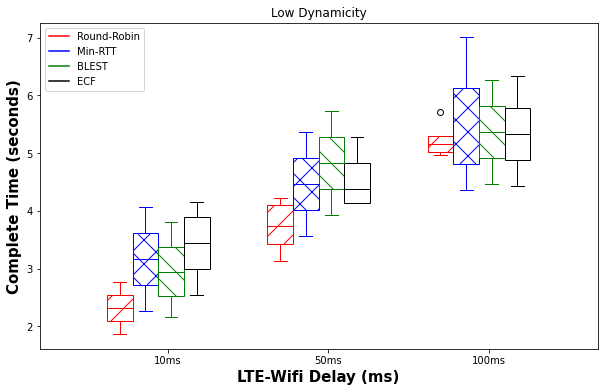

In [58]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [dl1['RR'], dl2['RR'], dl3['RR']]
ct1 = [dl1['MRTT'], dl2['MRTT'], dl3['MRTT']]
ct2 = [dl1['BLEST'], dl2['BLEST'], dl3['BLEST']]
ct3 = [dl1['ECF'], dl2['ECF'], dl3['ECF']]
# ct4 = [comTime0[4], comTime1[4], comTime2[4], comTime3[4], comTime4[4]]
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['10ms', '50ms', '100ms']
bar_width = 0.16
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(10,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
# ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1,widths=bar_width, patch_artist=True)
# for box in ct_plot4['boxes']:
#     box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
# define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
plt.xlabel("LTE-Wifi Delay (ms)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('Low Dynamicity')
# plt.savefig('./comTimeDiffDelay.png', format='png')
plt.show()

In [61]:

dl1=medium.loc[medium['delay']==10]
dl2=medium.loc[medium['delay']==100]
dl3=medium.loc[medium['delay']==200]


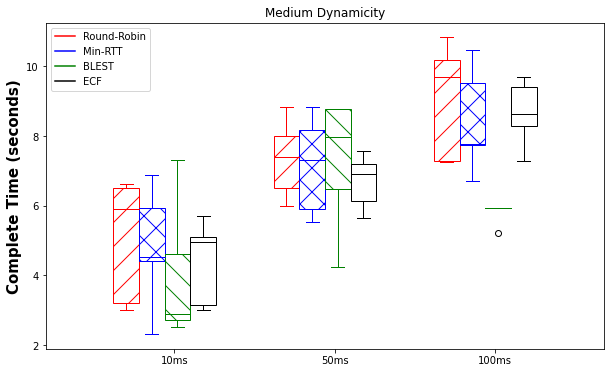

In [62]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [dl1['RR'], dl2['RR'], dl3['RR']]
ct1 = [dl1['MRTT'], dl2['MRTT'], dl3['MRTT']]
ct2 = [dl1['BLEST'], dl2['BLEST'], dl3['BLEST']]
ct3 = [dl1['ECF'], dl2['ECF'], dl3['ECF']]
# ct4 = [comTime0[4], comTime1[4], comTime2[4], comTime3[4], comTime4[4]]
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['10ms', '50ms', '100ms']
bar_width = 0.16
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(10,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
# ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1,widths=bar_width, patch_artist=True)
# for box in ct_plot4['boxes']:
#     box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
# define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
# plt.xlabel("LTE-Wifi Delay (ms)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('Medium Dynamicity')
# plt.savefig('./comTimeDiffDelay.png', format='png')
plt.show()

In [63]:

dl1=high.loc[high['delay']==10]
dl2=high.loc[high['delay']==100]
dl3=high.loc[high['delay']==200]

print(high)

          RR      MRTT     BLEST       ECF  delay  size scenario
10   1.48973   1.35698   1.35698   2.22423     10    40        2
11  11.31350   5.55282   5.55282   9.85060     10    45        2
12  15.55790   2.71812   2.71812   7.08401     10    50        2
13  18.93390   2.53297   2.53297   4.20866     10    55        2
14   1.76323   2.82384   2.82384   5.75822     10    60        2
25   9.73050   9.27010   9.27010   9.86580    100    40        2
26  11.17960   9.94220  10.04080  10.64800    100    45        2
27  11.59370  10.95490  10.95490  12.36450    100    50        2
28  13.94150  11.94690  11.84640  12.30700    100    55        2
29  13.58440  12.82880  13.46000  14.43390    100    60        2
40  10.05480   9.93990   3.39972   8.91403    200    40        2
41  11.35450  10.17160   3.39972   9.64490    200    45        2
42  12.91530  10.51400   3.39972  10.72820    200    50        2
43  12.99650  13.00480   3.39972  12.60290    200    55        2
44  18.51300  12.97970   

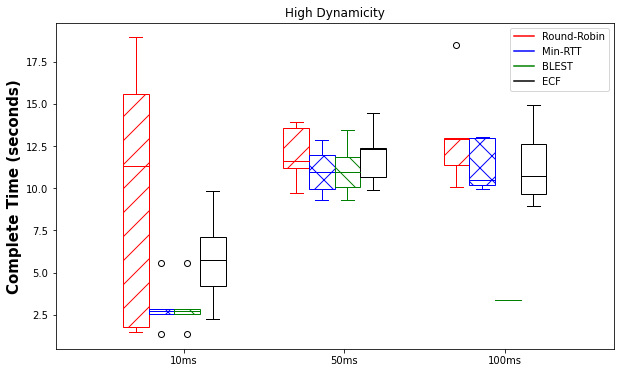

In [64]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [dl1['RR'], dl2['RR'], dl3['RR']]
ct1 = [dl1['MRTT'], dl2['MRTT'], dl3['MRTT']]
ct2 = [dl1['BLEST'], dl2['BLEST'], dl3['BLEST']]
ct3 = [dl1['ECF'], dl2['ECF'], dl3['ECF']]
# ct4 = [comTime0[4], comTime1[4], comTime2[4], comTime3[4], comTime4[4]]
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['10ms', '50ms', '100ms']
bar_width = 0.16
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(10,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
# ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1,widths=bar_width, patch_artist=True)
# for box in ct_plot4['boxes']:
#     box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
# define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
# plt.xlabel("LTE-Wifi Delay (ms)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('High Dynamicity')
# plt.savefig('./comTimeDiffDelay.png', format='png')
plt.show()

/home/shirley/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


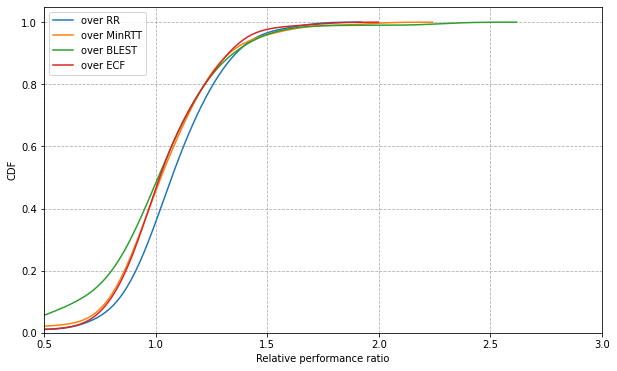

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data = dataTotal['RR']/dataTotal['MAB'], cumulative = True, label = "over RR")
sns.kdeplot(data = dataTotal['MRTT']/dataTotal['MAB'], cumulative = True, label = "over MinRTT")
sns.kdeplot(data = dataTotal['BLEST']/dataTotal['MAB'], cumulative = True, label = "over BLEST")
sns.kdeplot(data = dataTotal['ECF']/dataTotal['MAB'], cumulative = True, label = "over ECF")
plt.legend()
plt.grid(linestyle="--") 
plt.xlim(0.5,3)
plt.xlabel("Relative performance ratio")
plt.ylabel("CDF")
# plt.savefig('./performance-ratio-cdf.png', format='png')
plt.show()
  

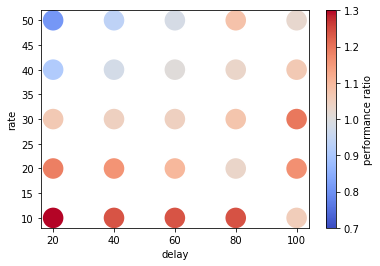

In [193]:
import matplotlib as mpl
dataTotal.head()
ecf_rate = dataTotal.eval("ECF / MAB")#.rename("ecf_rate")
ax = sns.scatterplot(data=dataTotal, x="delay", y="rate",hue=ecf_rate,hue_norm=(0.7, 1.3),palette="coolwarm",s=500, legend = False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0.7,vmax=1.3,clip=False),cmap="coolwarm"),
                          ticks=np.arange(0.7,1.4,0.1),
                          label="performance ratio")

plt.savefig('./ecf_ratio.png', format='png')  

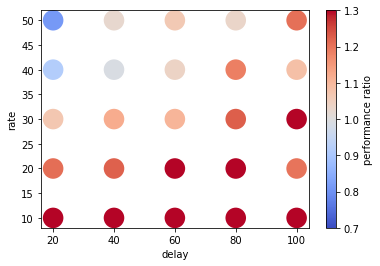

In [194]:
dataTotal.head()
ecf_rate = dataTotal.eval("BLEST / MAB")#.rename("ecf_rate")
ax = sns.scatterplot(data=dataTotal, x="delay", y="rate",hue=ecf_rate,hue_norm=(0.7, 1.3),palette="coolwarm",s=500, legend = False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0.7,vmax=1.3,clip=False),cmap="coolwarm"),
                          ticks=np.arange(0.7,1.4,0.1),
                          label="performance ratio")
plt.savefig('./blest_ratio.png', format='png')  

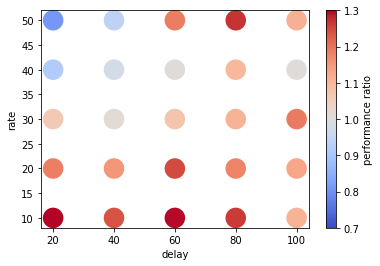

In [195]:
dataTotal.head()
ecf_rate = dataTotal.eval("MRTT / MAB")#.rename("ecf_rate")
ax = sns.scatterplot(data=dataTotal, x="delay", y="rate",hue=ecf_rate,hue_norm=(0.7, 1.3),palette="coolwarm",s=500, legend = False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0.7, vmax=1.3, clip=False),cmap="coolwarm"),
                          ticks=np.arange(0.7,1.4,0.1),
                          label="performance ratio")

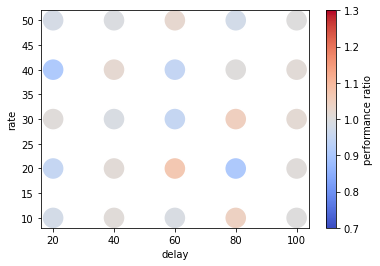

In [196]:
dataTotal.head()
ecf_rate = dataTotal.eval("RR / MAB")#.rename("ecf_rate")
ax = sns.scatterplot(data=dataTotal, x="delay", y="rate",hue=ecf_rate,hue_norm=(0.7, 1.3),palette="coolwarm",s=500, legend = False)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0.7, vmax=1.3, clip=False),cmap="coolwarm"),
                          ticks=np.arange(0.7,1.4,0.1),
                          label="performance ratio")

In [65]:
rateSet = [2,10,20,30,40,50]
delaySet = [20,40,60,80,100]

goodput = []
# get complete time
for delay in delaySet:
    for rate in rateSet:
        g_put = []
        for i in range(0,5):
            dir = 'test-nbg-ndy-'+str(rate)+'-'+str(delay)+'-80'
            file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
            lines = file.readlines()
            thp = float(lines[-1].split('\t')[5].strip()) + float(lines[-2].split('\t')[5].strip())
            g_put.append(thp)
        g_put.append(rate)
        g_put.append(delay)
        goodput.append(g_put)

goodTotal = pd.DataFrame (goodput, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'MAB','rate','delay'])
print(goodTotal)


           RR       MRTT      BLEST        ECF        MAB  rate  delay
0   32.508160  34.619780  35.466662  32.748730  32.634600     2     20
1   43.007390  39.844700  36.846270  41.593670  42.737300    10     20
2   49.231200  39.709170  38.475770  45.876200  48.952200    20     20
3   53.203200  42.729200  39.368700  48.928700  52.327900    30     20
4   58.283200  46.171700  45.777600  51.710500  55.948400    40     20
5   57.366300  52.905900  54.280800  54.257700  61.927600    50     20
6   30.361100  31.999180  33.423128  31.999180  30.500310     2     40
7   37.831860  35.895746  36.466356  35.895746  41.925710    10     40
8   45.023000  42.280190  37.417529  31.286782  40.435700    20     40
9   47.240800  35.331949  34.715345  45.545300  33.490530    30     40
10  46.291500  39.181100  36.753007  36.266664  49.827300    40     40
11  49.756800  46.250600  35.869830  44.324100  50.038900    50     40
12  28.205540  32.083205  33.700185  32.083205  28.226310     2     60
13  35

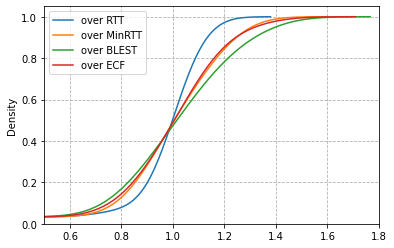

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# plt.figure(figsize=(15,6))
sns.kdeplot(data = goodTotal['MAB']/goodTotal['RR'], cumulative = True, label = "over RTT")
sns.kdeplot(data = goodTotal['MAB']/goodTotal['MRTT'], cumulative = True, label = "over MinRTT")
sns.kdeplot(data = goodTotal['MAB']/goodTotal['BLEST'], cumulative = True, label = "over BLEST")
sns.kdeplot(data = goodTotal['MAB']/goodTotal['ECF'], cumulative = True, label = "over ECF")
plt.legend()

plt.grid(linestyle="--") 
plt.xlim(0.5,1.8)
plt.show()

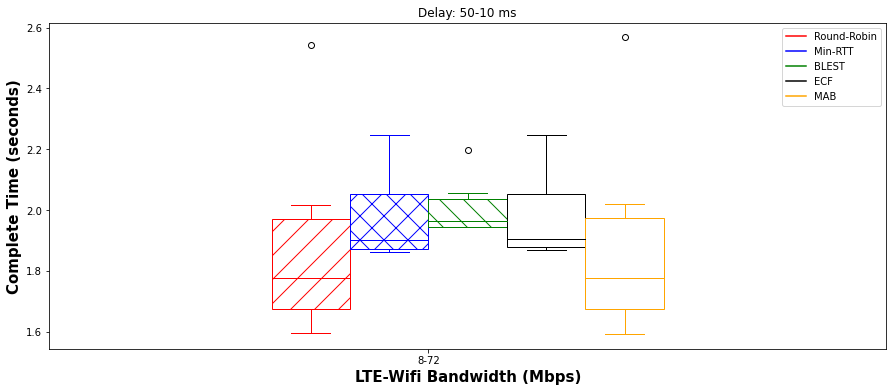

In [47]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [ds['RR']] #2
ct1 = [ds['MRTT']]
ct2 = [ds['BLEST']]
ct3 = [ds['ECF']]
ct4 = [ds['MAB']] #50
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['8-72']
# ticks = ['8-8', '8-16', '8-24', '8-32', '8-40', '8-48', '8-56', '8-64', '8-72']
bar_width = 0.15
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(15,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot4['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
plt.xlabel("LTE-Wifi Bandwidth (Mbps)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('Delay: 50-10 ms')
plt.savefig('./comTimeDiffRate1.png', format='png')
plt.show()

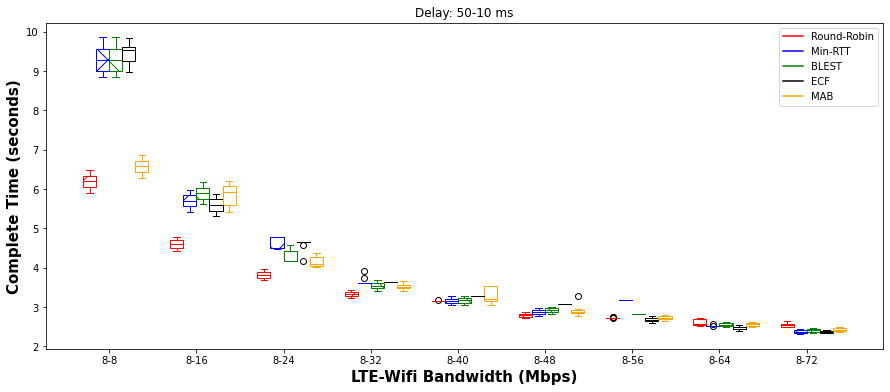

In [232]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [comTime0[0], comTime1[0], comTime2[0], comTime3[0], comTime4[0], comTime5[0], comTime6[0], comTime7[0], comTime8[0]]
ct1 = [comTime0[1], comTime1[1], comTime2[1], comTime3[1], comTime4[1], comTime5[1], comTime6[1], comTime7[1], comTime8[1]]
ct2 = [comTime0[2], comTime1[2], comTime2[2], comTime3[2], comTime4[2], comTime5[2], comTime6[2], comTime7[2], comTime8[2]]
ct3 = [comTime0[3], comTime1[3], comTime2[3], comTime3[3], comTime4[3], comTime5[3], comTime6[3], comTime7[3], comTime8[3]]
ct4 = [comTime0[4], comTime1[4], comTime2[4], comTime3[4], comTime4[4], comTime5[4], comTime6[4], comTime7[4], comTime8[4]]
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
# ticks = ['8-72', '8-64', '8-56', '8-48', '8-40']
ticks = ['8-8', '8-16', '8-24', '8-32', '8-40', '8-48', '8-56', '8-64', '8-72']
bar_width = 0.15
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(15,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.15,widths=bar_width, patch_artist=True)
for box in ct_plot4['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'black', 'ECF')
define_box_properties(ct_plot4, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2.5*bar_width, ticks)
 
plt.ylabel("Complete Time (seconds)", fontsize=15, fontweight='bold')
plt.xlabel("LTE-Wifi Bandwidth (Mbps)", fontsize=15, fontweight='bold')
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
plt.title('Delay: 50-10 ms')
plt.savefig('./comTimeDiffRate1.png', format='png')
plt.show()

In [185]:
# get throughput

gpt10 = []
for j in range(0,4):
    goodput = []
    for i in range(80,90):
        dir = 'r10size'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-rx.txt', 'r')
        lines = file.readlines()
        thp = float(lines[-1].split('\t')[5].strip()) + float(lines[-2].split('\t')[5].strip())
        goodput.append(thp)
#     print(c_time)
    gpt10.append(goodput)
print(gpt10)

gpt5 = []
for j in range(0,4):
    goodput = []
    for i in range(80,90):
        dir = 'r5size'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-rx.txt', 'r')
        lines = file.readlines()
        thp = float(lines[-1].split('\t')[5].strip()) + float(lines[-2].split('\t')[5].strip())
        goodput.append(thp)
#     print(c_time)
    gpt5.append(goodput)
print(gpt5)

gpt2 = []
for j in range(0,4):
    goodput = []
    for i in range(80,90):
        dir = 'r2size'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-rx.txt', 'r')
        lines = file.readlines()
        thp = float(lines[-1].split('\t')[5].strip()) + float(lines[-2].split('\t')[5].strip())
        goodput.append(thp)
#     print(c_time)
    gpt2.append(goodput)
print(gpt2)


[[25.08494, 25.08244, 25.331039999999998, 25.71474, 26.17764, 26.39914, 27.08194, 27.29864, 27.364639999999998, 27.473139999999997], [37.2389, 37.4231, 37.0587, 37.738, 37.9108, 38.081, 38.2483, 38.4109, 37.5613, 37.7258], [37.5649, 37.7223, 37.3225, 38.0076, 38.1389, 38.2783, 38.4149, 38.5619, 37.6823, 37.8462], [36.58167, 36.33707, 36.66347, 37.32757, 37.62227, 38.91457, 39.43559, 38.04363, 37.453998000000006, 38.034579]]
[[22.83718, 22.90816, 22.932380000000002, 23.06328, 23.21951, 23.31684, 23.224929999999997, 23.482590000000002, 23.30405, 23.304660000000002], [20.8507, 20.9275, 20.6976, 20.7758, 20.8526, 20.9277, 21.1483, 21.217, 20.9974, 21.0555], [20.898, 20.821, 20.6975, 20.7757, 20.8524, 20.9276, 21.1482, 21.2169, 20.9973, 21.0553], [21.665315, 21.570226, 21.651460999999998, 21.397972000000003, 21.483735, 21.331834999999998, 21.641122, 21.690811999999998, 21.855511, 21.921811]]
[[12.08352, 12.20022, 12.31504, 12.16041, 12.23447, 12.23817, 12.341890000000001, 12.309560000000001

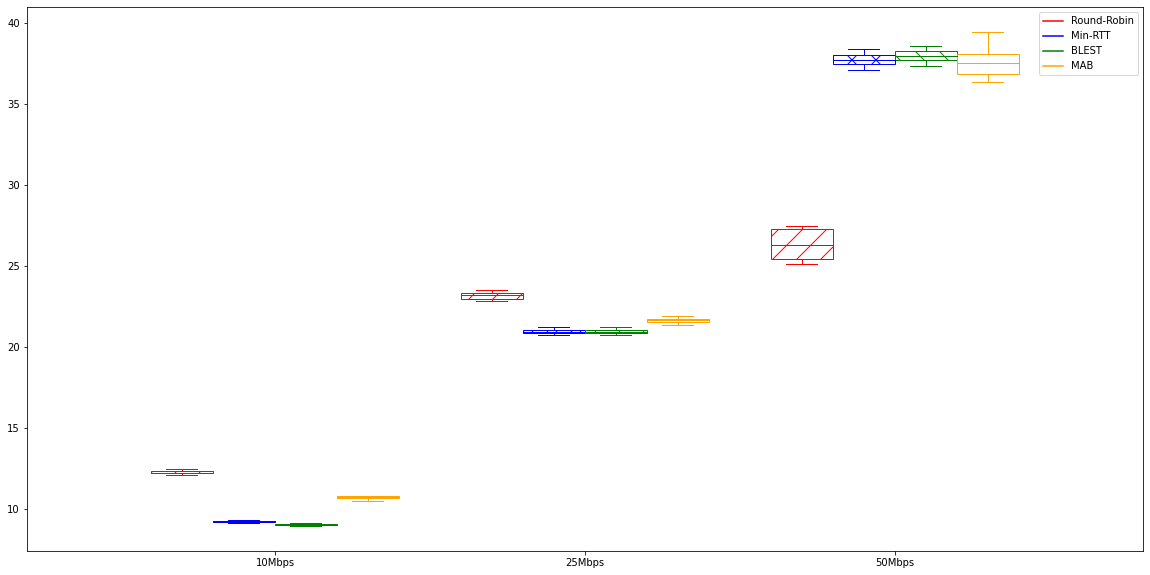

In [186]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [gpt2[0], gpt5[0], gpt10[0]]
ct1 = [gpt2[1], gpt5[1], gpt10[1]]
ct2 = [gpt2[2], gpt5[2], gpt10[2]]
ct3 = [gpt2[3], gpt5[3], gpt10[3]]
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['10Mbps', '25Mbps', '50Mbps']
bar_width = 0.2
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(20,10))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2*bar_width, ticks)
 
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
# plt.title('Grouped boxplot using matplotlib')
plt.show()

In [174]:
import statistics as stat
#get queue size (out of order packets)
qs0 = []
# get complete time
for j in range(0,4):
    c_time = []
    for i in range(80,90):
        dir = 'r10size'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-queue.txt', 'r')
        lines = file.readlines()
        queueSize = []
        for line in lines:
            items = line.split('\t')
            if(len(items) < 5):
                continue
            queueSize.append(int(items[4]))
        c_time.append(stat.mean(queueSize))
#     print(c_time)
    qs0.append(c_time)
print(qs0)

qs1 = []
# get complete time
for j in range(0,4):
    c_time = []
    for i in range(80,90):
        dir = 'r5size'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-queue.txt', 'r')
        lines = file.readlines()
        queueSize = []
        for line in lines:
            items = line.split('\t')
            if(len(items) < 5):
                continue
            queueSize.append(int(items[4]))
        c_time.append(stat.mean(queueSize))
#     print(c_time)
    qs1.append(c_time)
print(qs1)

qs2 = []
# get complete time
for j in range(0,4):
    c_time = []
    for i in range(80,90):
        dir = 'r2size'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-queue.txt', 'r')
        lines = file.readlines()
        queueSize = []
        for line in lines:
            items = line.split('\t')
            if(len(items) < 5):
                continue
            queueSize.append(int(items[4]))
        c_time.append(stat.mean(queueSize))
#     print(c_time)
    qs2.append(c_time)
print(qs2)

[[1234703.1644025266, 1265097.7460263204, 1295862.9344926558, 1327322.2958051872, 1359104.1733003708, 1391365.1004967832, 1424281.561976819, 1457456.7501591344, 1491270.5896326595, 1525511.0842277182], [124808.37518387125, 123261.86908220817, 121763.49755191625, 120291.08431323493, 118863.6499381953, 117469.69557781579, 116098.71152607855, 114768.49077021006, 113459.4817902934, 112179.99626691554], [128072.29454010556, 126131.94052298753, 124251.41144690191, 122748.91335168043, 120914.50597445406, 119255.74558188778, 117629.94558918223, 116115.26766390834, 114539.77660662314, 113248.10857053974], [1379907.20801246, 1396682.6674927364, 1414211.527013338, 1432374.9271120008, 1451209.5778327154, 1470828.478947797, 1453662.553847392, 1437006.967616168, 1420616.9723118069, 1404596.6378130347]]
[[797902.0855758415, 789472.0371731328, 781454.6082221847, 773644.8824952047, 766069.8988875154, 758583.694926297, 751015.9955730843, 743902.7564449395, 736854.5529772674, 730023.7920360864], [35362.2

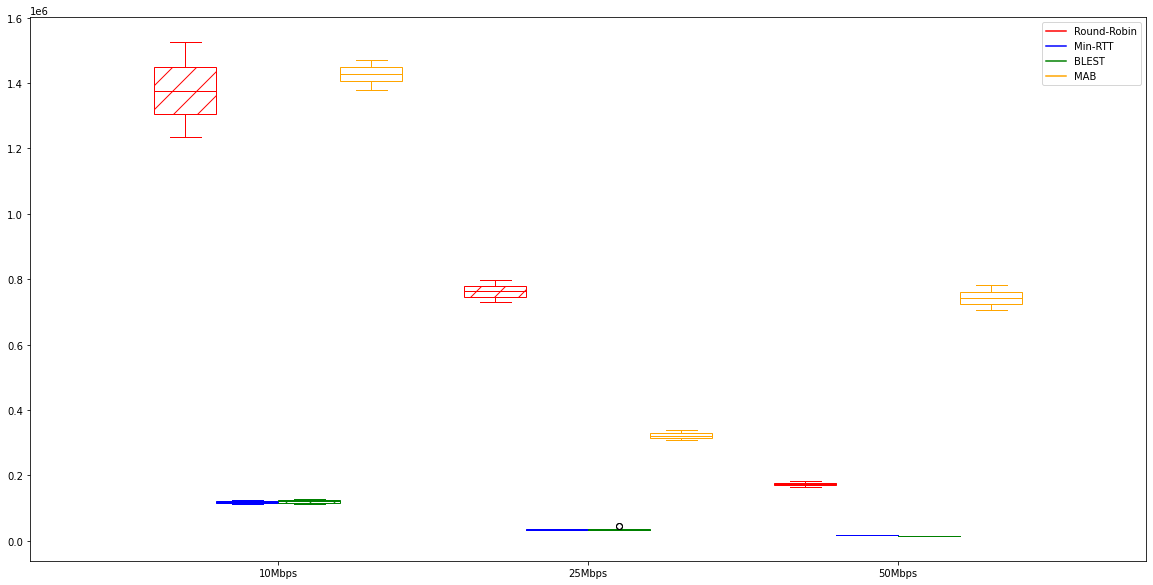

In [175]:
import matplotlib.pyplot as plt
import numpy as np
 
ct0 = [qs0[0], qs1[0], qs2[0]]
ct1 = [qs0[1], qs1[1], qs2[1]]
ct2 = [qs0[2], qs1[2], qs2[2]]
ct3 = [qs0[3], qs1[3], qs2[3]]
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['10Mbps', '25Mbps', '50Mbps']
bar_width = 0.2
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
plt.figure(figsize=(20,10))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0)))+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1,widths=bar_width, patch_artist=True)
for box in ct_plot3['boxes']:
    box.set(hatch = '', fill=False) 

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'Round-Robin')
define_box_properties(ct_plot1, 'blue', 'Min-RTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'orange', 'MAB')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks))+2*bar_width, ticks)
 
# set the limit for x axis
# plt.xlim(-2, len(ticks)*2)
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
# plt.title('Grouped boxplot using matplotlib')
plt.show()

In [59]:
# Creating dataset
# np.random.seed(10)
 
# data_1 = np.random.normal(100, 10, 200)
# data_2 = np.random.normal(90, 20, 200)
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
# data = [data_1, data_2, data_3, data_4]
table = []
for i in range(0,4):
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    lines = file.readlines()
    queueSize = []
    for line in lines:
        items = line.split('\t')
        if(len(items) < 5):
            continue
        queueSize.append(int(items[4]))
    table.append(queueSize)
 
print(len(table))

4


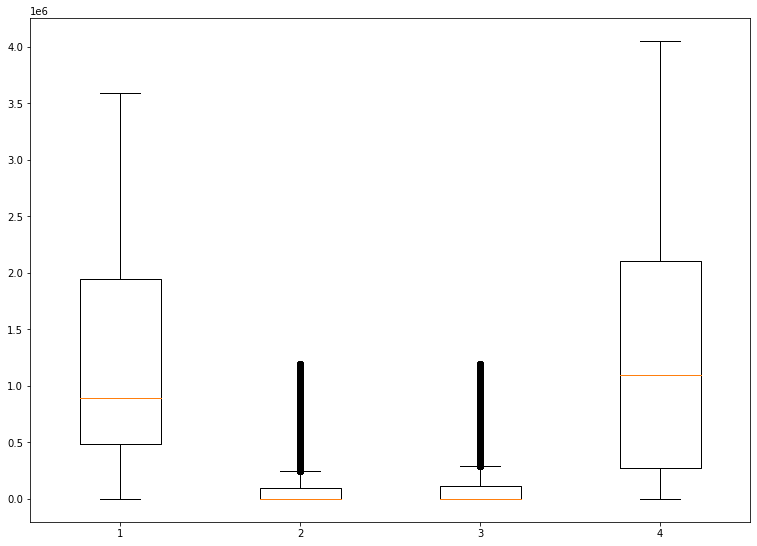

In [62]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(table)
 
# show plot
plt.show()



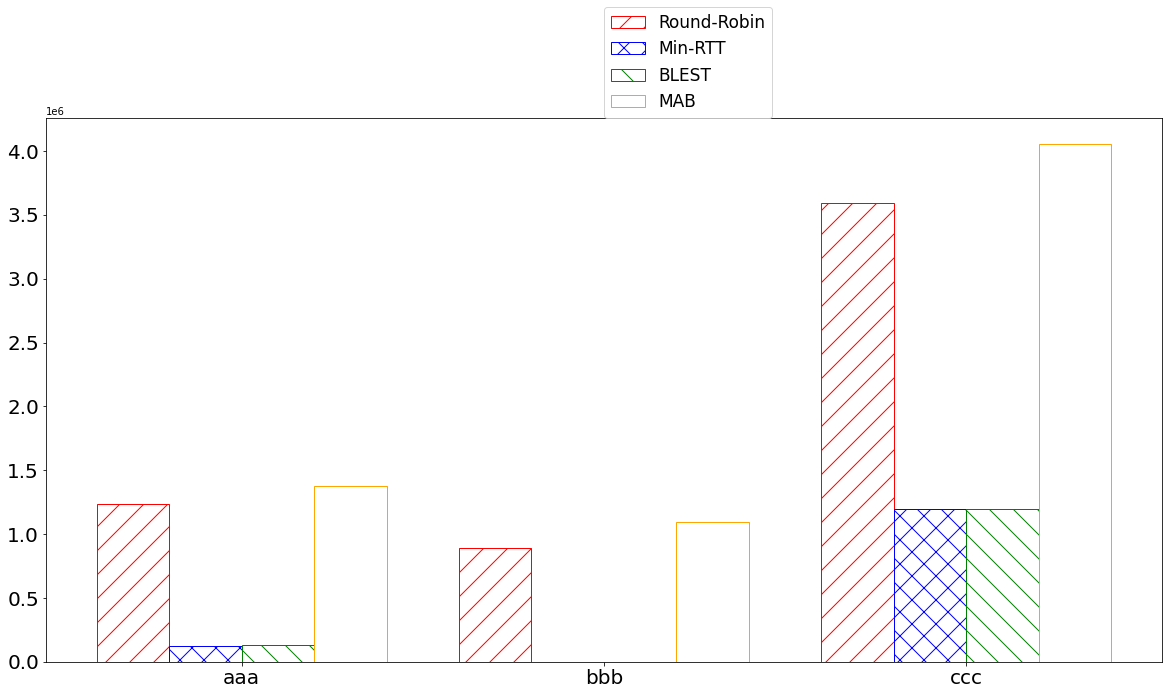

In [115]:
# avgQueue = [stat.mean(table[0]),stat.mean(table[1]),stat.mean(table[2]),stat.mean(table[3])]

# # Make a random dataset:
# # height = [3, 12, 5, 18, 45]
# bars = ('A', 'B', 'C', 'D')
# y_pos = np.arange(len(bars))

# # Create bars
# plt.bar(y_pos, avgQueue)

# # Create names on the x-axis
# plt.xticks(y_pos, bars)

# # Show graphic
# plt.show()


import matplotlib.pyplot as plt 
import numpy as np
from pylab import mpl

# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
avgQueue0 = [stat.mean(table[0]), stat.median(table[0]), max(table[0])]
avgQueue1 = [stat.mean(table[1]), stat.median(table[1]), max(table[1])]
avgQueue2 = [stat.mean(table[2]), stat.median(table[2]), max(table[2])]
avgQueue3 = [stat.mean(table[3]), stat.median(table[3]), max(table[3])]

labels = ['aaa', 'bbb', 'ccc'] 
bar_width = 0.2
 
# 绘图
plt.figure(figsize=(20,10))
plt.bar(np.arange(3), avgQueue0, label='Round-Robin', color='white', alpha=1, width=bar_width,edgecolor="red",hatch='/') 
plt.bar(np.arange(3) + bar_width, avgQueue1, label='Min-RTT', color='white', alpha=1, edgecolor="blue",width=bar_width,hatch="x")
plt.bar(np.arange(3) + 2*bar_width, avgQueue2, label='BLEST', color='white', alpha=1, edgecolor="green",width=bar_width,hatch="\\")
plt.bar(np.arange(3) + 3*bar_width, avgQueue3, label='MAB', color='white', alpha=1, edgecolor="orange",width=bar_width,hatch="")
 
# 添加刻度标签 
plt.xticks(np.arange(3) + 1.5*bar_width, labels)
plt.tick_params(labelsize=20)
# 设置Y轴的刻度范围 
# plt.ylim([0, 100]) 
 
# # 为每个条形图添加数值标签 
# for x2016, y2016 in enumerate(Y2016): 
#     plt.text(x2016, y2016 + 2, '%s' % y2016, ha='center',fontsize=20) 
 
# for x2017, y2017 in enumerate(Y2017): 
#     plt.text(x2017 + bar_width, y2017 + 2, '%s' % y2017, ha='center',fontsize=20)

# for x2018, y2018 in enumerate(Y2018): 
#     plt.text(x2018 + 2*bar_width, y2018 + 2, '%s' % y2018, ha='center',fontsize=20)
# 显示图例
plt.legend(bbox_to_anchor=(0.5,1), loc=3, borderaxespad=0,fontsize=17)
# plt.savefig('foo.png') 
# 显示图形 
plt.show() 


In [34]:
comTime10 = []
# get complete time

for j in range(0,4):
    c_time = []
    for i in range(1,11):
        dir = 'blest5'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        c_time.append(float(last_line.split('\t')[0])-1)
#     print(c_time)
    comTime10.append(c_time)
print(comTime10)

ValueError: could not convert string to float: 'Interrupted \n'

IndexError: list index out of range

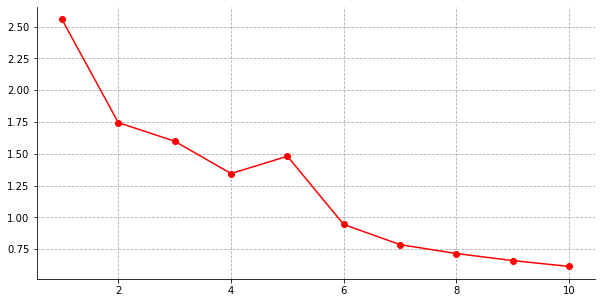

In [35]:
# blest verify
import numpy as np
import matplotlib.pyplot as plt



x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框


# plt.plot(x, comTime10[0], marker='o', color="blue", label="RR", linewidth=1.5)
plt.plot(x, comTime10[1], marker='o', color="red", label="Min-RTT", linewidth=1.5)
plt.plot(x, comTime10[2], marker='o', color="green", label="BLEST", linewidth=1.5)
# plt.plot(x, comTime10[3], marker='o', color="orange", label="MAB", linewidth=1.5)

group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9','1-10']  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
# plt.yticks(fontsize=12, fontweight='bold')
# # plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Complete Time (s)", fontsize=13, fontweight='bold')
plt.xlabel("Wifi-LTE Bandwidth (Mbps)", fontsize=13, fontweight='bold')
# plt.xlim(0.9, 6.1)  # 设置x轴的范围
plt.ylim(0, 3)

# # plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./filename.svg', format='svg')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()

In [55]:
comTime10 = []
# get complete time

for j in range(0,4):
    c_time = []
    for i in range(1,11):
        dir = 'blest'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        c_time.append(float(last_line.split('\t')[0])-1)
#     print(c_time)
    comTime10.append(c_time)
print(comTime10)

[[4.66029, 3.22844, 2.92515, 2.65304, 2.65157, 2.40059, 2.15143, 1.95064, 1.82512, 1.69951], [4.76539, 3.2651199999999996, 2.89934, 2.1462, 1.78071, 1.7003, 1.64019, 1.6111900000000001, 1.4628100000000002, 1.42563], [4.71268, 3.2373000000000003, 2.62691, 2.26847, 1.6811500000000001, 1.6149, 1.3979300000000001, 1.31114, 1.2717800000000001, 1.2471], [4.69956, 3.3168800000000003, 2.84246, 2.73394, 2.39801, 2.33659, 2.16143, 1.9350999999999998, 1.8071899999999999, 1.68831]]


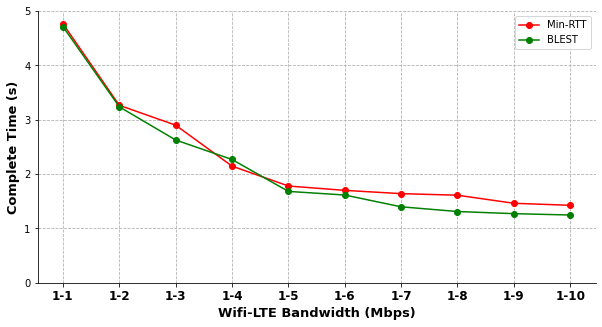

In [60]:
# blest verify with 1MB file
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框


# plt.plot(x, comTime10[0], marker='o', color="blue", label="RR", linewidth=1.5)
plt.plot(x, comTime10[1], marker='o', color="red", label="Min-RTT", linewidth=1.5)
plt.plot(x, comTime10[2], marker='o', color="green", label="BLEST", linewidth=1.5)
# plt.plot(x, comTime10[3], marker='o', color="orange", label="MAB", linewidth=1.5)

group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9','1-10']  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
# plt.yticks(fontsize=12, fontweight='bold')
# # plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Complete Time (s)", fontsize=13, fontweight='bold')
plt.xlabel("Wifi-LTE Bandwidth (Mbps)", fontsize=13, fontweight='bold')
# plt.xlim(0.9, 6.1)  # 设置x轴的范围
plt.ylim(0, 5)

# # plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

plt.savefig('./blest_verify.png', format='png')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()